<a href="https://colab.research.google.com/github/nisaaa7/Kredit/blob/main/PROJECT_KEL_6_(Analisis_Kredit).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import sklearn.linear_model as lm
import sklearn
import sklearn.model_selection as ms
import sklearn.metrics as met
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

In [ ]:
pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
link_file = "/content/drive/My Drive/PMM/Dataset.csv"
df = pd.read_csv(link_file)
df.head(373027)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,...,zip_code,addr_state,dti,total_acc,total_pymnt,total_rec_prncp,recoveries,last_pymnt_amnt,application_type,loan_status_class
0,0,10588532,12470492,15000,15000,36 months,8.90,476.30,A,A5,...,541xx,WI,17.01,32.0,16561.02000,15000.00,0.0,8940.22,INDIVIDUAL,1
1,1,11215587,13127755,8000,8000,60 months,18.25,204.24,D,D3,...,370xx,TN,23.46,25.0,4697.52000,2253.46,0.0,204.24,INDIVIDUAL,1
2,2,14218271,16270650,12150,12150,60 months,18.92,314.65,D,D4,...,376xx,TN,31.07,22.0,6293.00000,2867.76,0.0,314.65,INDIVIDUAL,1
3,3,6504869,8057011,10000,10000,36 months,6.03,304.36,A,A1,...,376xx,TN,9.16,17.0,10858.01000,10000.00,0.0,3553.37,INDIVIDUAL,1
4,4,3929378,5022980,15825,15825,36 months,12.12,526.53,B,B3,...,986xx,WA,17.94,31.0,4736.52000,3435.17,0.0,526.53,INDIVIDUAL,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373022,373022,2085025,2417205,10800,10800,36 months,17.77,389.21,D,D1,...,483xx,MI,16.40,28.0,12921.42242,10800.00,0.0,7084.62,INDIVIDUAL,1
373023,373023,3368168,4220899,22800,22800,60 months,16.29,557.98,C,C4,...,956xx,CA,15.12,22.0,18968.20000,10641.63,0.0,557.98,INDIVIDUAL,1
373024,373024,15440103,17512543,20275,20275,36 months,12.49,678.18,B,B4,...,660xx,KS,22.70,20.0,13563.60000,10327.18,0.0,678.18,INDIVIDUAL,1
373025,373025,9025241,10837338,25000,25000,60 months,14.30,585.61,C,C1,...,800xx,CO,22.91,24.0,30285.29598,25000.00,0.0,19162.85,INDIVIDUAL,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373028 entries, 0 to 373027
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           373028 non-null  int64  
 1   id                   373028 non-null  int64  
 2   member_id            373028 non-null  int64  
 3   loan_amnt            373028 non-null  int64  
 4   funded_amnt          373028 non-null  int64  
 5   term                 373028 non-null  object 
 6   int_rate             373028 non-null  float64
 7   installment          373028 non-null  float64
 8   grade                373028 non-null  object 
 9   sub_grade            373028 non-null  object 
 10  emp_title            350981 non-null  object 
 11  emp_length           356235 non-null  object 
 12  home_ownership       373028 non-null  object 
 13  annual_inc           373024 non-null  float64
 14  verification_status  373028 non-null  object 
 15  purpose          

In [ ]:
#cek data kosong
df.isnull().sum()

Unnamed: 0                 0
id                         0
member_id                  0
loan_amnt                  0
funded_amnt                0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title              22047
emp_length             16793
home_ownership             0
annual_inc                 4
verification_status        0
purpose                    0
title                     16
zip_code                   0
addr_state                 0
dti                        0
total_acc                 25
total_pymnt                0
total_rec_prncp            0
recoveries                 0
last_pymnt_amnt            0
application_type           0
loan_status_class          0
dtype: int64

In [ ]:
modus = df['emp_title'].mode()[0]
df['emp_title'] = df['emp_title'].fillna(modus)
df['emp_title'].isna().sum()

0

In [ ]:
modus = df['emp_length'].mode()[0]
df['emp_length'] = df['emp_length'].fillna(modus)
df['emp_length'].isna().sum()

0

In [ ]:
modus = df['annual_inc'].mode()[0]
df['annual_inc'] = df['annual_inc'].fillna(modus)
df['annual_inc'].isna().sum()

0

In [ ]:
modus = df['title'].mode()[0]
df['title'] = df['title'].fillna(modus)
df['title'].isna().sum()

0

In [ ]:
modus = df['total_acc'].mode()[0]
df['total_acc'] = df['total_acc'].fillna(modus)
df['total_acc'].isna().sum()

0

In [ ]:
df['grade'].unique()

array(['A', 'D', 'B', 'F', 'C', 'E', 'G'], dtype=object)

In [ ]:
label_encoder = preprocessing.LabelEncoder()
df['grade'] = label_encoder.fit_transform(df['grade'])
df['grade'].unique()

array([0, 3, 1, 5, 2, 4, 6])

In [ ]:
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [ ]:
le = preprocessing.LabelEncoder()
df.grade = le.fit_transform(df.grade)
df.sub_grade = le.fit_transform(df.sub_grade)
df.home_ownership = le.fit_transform(df.home_ownership)
df.verification_status = le.fit_transform(df.verification_status)
df.purpose = le.fit_transform(df.purpose)
df.emp_length = le.fit_transform(df.emp_length)
df.term = le.fit_transform(df.term)
df.term = df.term.astype(int)
df.emp_length = df.emp_length.astype(int)
df.purpose = df.purpose.astype(int)
df.verification_status = df.verification_status.astype(int)
df.home_ownership = df.home_ownership.astype(int)
df.grade = df.grade.astype(int)
df.sub_grade = df.sub_grade.astype(int)

In [ ]:
df.head(373027)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,...,zip_code,addr_state,dti,total_acc,total_pymnt,total_rec_prncp,recoveries,last_pymnt_amnt,application_type,loan_status_class
0,0,10588532,12470492,15000,15000,0,8.90,476.30,0,4,...,541xx,WI,17.01,32.0,16561.02000,15000.00,0.0,8940.22,INDIVIDUAL,1
1,1,11215587,13127755,8000,8000,1,18.25,204.24,3,17,...,370xx,TN,23.46,25.0,4697.52000,2253.46,0.0,204.24,INDIVIDUAL,1
2,2,14218271,16270650,12150,12150,1,18.92,314.65,3,18,...,376xx,TN,31.07,22.0,6293.00000,2867.76,0.0,314.65,INDIVIDUAL,1
3,3,6504869,8057011,10000,10000,0,6.03,304.36,0,0,...,376xx,TN,9.16,17.0,10858.01000,10000.00,0.0,3553.37,INDIVIDUAL,1
4,4,3929378,5022980,15825,15825,0,12.12,526.53,1,7,...,986xx,WA,17.94,31.0,4736.52000,3435.17,0.0,526.53,INDIVIDUAL,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373022,373022,2085025,2417205,10800,10800,0,17.77,389.21,3,15,...,483xx,MI,16.40,28.0,12921.42242,10800.00,0.0,7084.62,INDIVIDUAL,1
373023,373023,3368168,4220899,22800,22800,1,16.29,557.98,2,13,...,956xx,CA,15.12,22.0,18968.20000,10641.63,0.0,557.98,INDIVIDUAL,1
373024,373024,15440103,17512543,20275,20275,0,12.49,678.18,1,8,...,660xx,KS,22.70,20.0,13563.60000,10327.18,0.0,678.18,INDIVIDUAL,1
373025,373025,9025241,10837338,25000,25000,1,14.30,585.61,2,10,...,800xx,CO,22.91,24.0,30285.29598,25000.00,0.0,19162.85,INDIVIDUAL,1


In [ ]:
#Cek ulang data kosong
df.isnull().sum().sum()

0

In [ ]:
korelasi = df.corr()
korelasi

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,...,annual_inc,verification_status,purpose,dti,total_acc,total_pymnt,total_rec_prncp,recoveries,last_pymnt_amnt,loan_status_class
Unnamed: 0,1.000000,-0.001967,-0.001870,-0.000650,-0.000560,-0.002397,0.001843,0.000220,0.001969,0.001864,...,-0.000434,-0.001282,0.002030,0.000474,0.000284,-0.000255,-0.000040,0.001354,0.000262,-0.000562
id,-0.001967,1.000000,0.997310,0.066880,0.070460,0.078545,-0.030479,0.039300,0.046519,0.046263,...,0.023503,-0.057720,-0.082985,0.128927,0.074260,-0.285071,-0.278817,-0.065568,-0.079273,0.094820
member_id,-0.001870,0.997310,1.000000,0.069624,0.073327,0.079623,-0.028223,0.042134,0.046587,0.046296,...,0.024181,-0.056231,-0.085793,0.128688,0.074500,-0.283276,-0.277570,-0.065743,-0.077776,0.095701
loan_amnt,-0.000650,0.066880,0.069624,1.000000,0.998552,0.413546,0.166809,0.949676,0.163067,0.170954,...,0.364168,0.364158,-0.156416,0.058162,0.235752,0.743750,0.612657,0.110606,0.304977,-0.012414
funded_amnt,-0.000560,0.070460,0.073327,0.998552,1.000000,0.411541,0.167528,0.951788,0.162679,0.170425,...,0.363599,0.363445,-0.158062,0.059537,0.235702,0.743273,0.612211,0.110296,0.304949,-0.011587
term,-0.002397,0.078545,0.079623,0.413546,0.411541,1.000000,0.443676,0.160356,0.452233,0.463658,...,0.068676,0.261437,-0.042942,0.092150,0.102009,0.175192,0.009842,0.090823,0.111586,-0.065165
int_rate,0.001843,-0.030479,-0.028223,0.166809,0.167528,0.443676,1.000000,0.148166,0.951904,0.973918,...,-0.045007,0.236284,0.135679,0.159938,-0.033272,0.126426,-0.032752,0.128385,0.075368,-0.172665
installment,0.000220,0.039300,0.042134,0.949676,0.951788,0.160356,0.148166,1.000000,0.136639,0.143570,...,0.361456,0.332865,-0.143181,0.050858,0.216303,0.764295,0.663420,0.105453,0.300785,-0.014173
grade,0.001969,0.046519,0.046587,0.163067,0.162679,0.452233,0.951904,0.136639,1.000000,0.977235,...,-0.037112,0.208968,0.148102,0.146810,-0.029525,0.094718,-0.060177,0.123002,0.060081,-0.166152
sub_grade,0.001864,0.046263,0.046296,0.170954,0.170425,0.463658,0.973918,0.143570,0.977235,1.000000,...,-0.037059,0.217408,0.151184,0.151284,-0.030559,0.100735,-0.058040,0.126189,0.062895,-0.170004


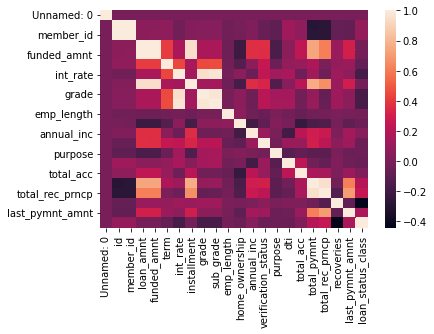

In [ ]:
import seaborn as sns
sns.heatmap(korelasi);

In [ ]:
df1 = df.drop(['id','emp_title','title','zip_code','addr_state','application_type'], axis='columns')
df1.head(373027)

,Unnamed: 0,member_id,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,...,annual_inc,verification_status,purpose,dti,total_acc,total_pymnt,total_rec_prncp,recoveries,last_pymnt_amnt,loan_status_class
0,0,12470492,15000,15000,0,8.90,476.30,0,4,7,...,80000.0,1,1,17.01,32.0,16561.02000,15000.00,0.0,8940.22,1
1,1,13127755,8000,8000,1,18.25,204.24,3,17,1,...,44000.0,2,9,23.46,25.0,4697.52000,2253.46,0.0,204.24,1
2,2,16270650,12150,12150,1,18.92,314.65,3,18,3,...,27000.0,1,1,31.07,22.0,6293.00000,2867.76,0.0,314.65,1
3,3,8057011,10000,10000,0,6.03,304.36,0,0,3,...,33000.0,0,2,9.16,17.0,10858.01000,10000.00,0.0,3553.37,1
4,4,5022980,15825,15825,0,12.12,526.53,1,7,1,...,59000.0,2,2,17.94,31.0,4736.52000,3435.17,0.0,526.53,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373022,373022,2417205,10800,10800,0,17.77,389.21,3,15,0,...,45000.0,0,2,16.40,28.0,12921.42242,10800.00,0.0,7084.62,1
373023,373023,4220899,22800,22800,1,16.29,557.98,2,13,1,...,85000.0,2,2,15.12,22.0,18968.20000,10641.63,0.0,557.98,1
373024,373024,17512543,20275,20275,0,12.49,678.18,1,8,7,...,48000.0,2,1,22.70,20.0,13563.60000,10327.18,0.0,678.18,1
373025,373025,10837338,25000,25000,1,14.30,585.61,2,10,1,...,65530.0,2,2,22.91,24.0,30285.29598,25000.00,0.0,19162.85,1


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373028 entries, 0 to 373027
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           373028 non-null  int64  
 1   member_id            373028 non-null  int64  
 2   loan_amnt            373028 non-null  int64  
 3   funded_amnt          373028 non-null  int64  
 4   term                 373028 non-null  int64  
 5   int_rate             373028 non-null  float64
 6   installment          373028 non-null  float64
 7   grade                373028 non-null  int64  
 8   sub_grade            373028 non-null  int64  
 9   emp_length           373028 non-null  int64  
 10  home_ownership       373028 non-null  int64  
 11  annual_inc           373028 non-null  float64
 12  verification_status  373028 non-null  int64  
 13  purpose              373028 non-null  int64  
 14  dti                  373028 non-null  float64
 15  total_acc        

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(df1[['loan_amnt','funded_amnt','term','int_rate','installment','grade','sub_grade','emp_length','home_ownership','annual_inc','verification_status','purpose','dti','total_acc','total_pymnt','total_rec_prncp','recoveries','last_pymnt_amnt']],df1.loan_status_class,test_size=0.1)

In [ ]:
X_train

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,total_acc,total_pymnt,total_rec_prncp,recoveries,last_pymnt_amnt
131690,24000,24000,1,15.59,578.42,3,15,6,4,72000.0,2,2,30.63,20.0,7477.890000,3749.54,0.00,578.42
37046,25000,25000,1,21.00,676.34,4,21,3,4,80000.0,2,2,27.12,51.0,25680.370000,12729.99,0.00,676.34
198197,4000,4000,0,13.98,136.68,2,12,1,4,45600.0,0,1,19.45,32.0,4092.150568,4000.00,0.00,3955.47
239520,29100,29100,1,20.49,778.93,4,20,1,3,65000.0,2,2,30.92,26.0,24135.710000,11396.83,0.00,778.93
27937,4000,4000,0,18.55,145.72,3,16,1,4,14940.0,1,2,18.31,25.0,1904.050000,899.56,447.07,145.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351249,10000,10000,0,7.90,312.91,0,3,1,0,53000.0,0,2,19.77,63.0,7196.930000,6113.89,0.00,312.91
320111,13600,13600,0,11.14,446.15,1,6,1,0,70000.0,0,2,16.27,28.0,15168.916160,13600.00,0.00,8923.48
283691,24000,24000,0,6.03,730.46,0,0,1,3,80000.0,1,2,17.18,27.0,13878.740000,12126.60,0.00,730.46
333734,25000,25000,1,10.99,543.44,1,7,3,0,165000.0,1,1,9.71,39.0,8695.040000,5392.54,0.00,543.44


In [ ]:
X_test

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,total_acc,total_pymnt,total_rec_prncp,recoveries,last_pymnt_amnt
186669,28000,28000,0,11.11,918.15,1,9,1,4,151200.0,2,2,8.60,31.0,33035.56204,28000.00,0.00,1015.00
44731,8500,8500,0,15.80,298.00,2,12,5,4,35000.0,0,2,6.58,13.0,10285.25665,8500.00,0.00,4340.85
200562,9950,9950,0,12.68,333.73,2,10,1,4,25404.0,0,2,17.15,15.0,2803.00000,1644.25,477.53,333.73
124718,8000,8000,0,10.15,258.71,1,6,1,4,89589.0,0,2,16.58,46.0,4398.07000,3477.08,0.00,258.71
144708,10000,10000,0,13.11,337.47,1,8,1,0,110000.0,2,2,1.89,27.0,11973.08000,10000.00,0.00,861.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105094,25000,25000,0,16.63,886.75,4,23,1,4,118000.0,2,11,2.84,30.0,1986.79000,539.45,1101.35,886.75
345314,20000,20000,0,18.25,725.56,3,16,1,0,78000.0,1,2,19.72,37.0,23637.88814,20000.00,0.00,14206.24
83581,14000,14000,0,12.49,468.29,1,9,2,3,40000.0,0,2,15.87,18.0,3727.68000,978.18,2312.52,20.00
24236,35000,35000,1,10.49,752.12,1,7,0,0,120000.0,2,2,25.54,33.0,9757.16000,6114.28,0.00,752.12


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
logreg = LogisticRegression()

In [ ]:
logreg.fit(X_train, Y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
Y_prediksi_log = logreg.predict(X_test)
logreg.coef_

array([[-6.73809061e-04,  9.24713247e-04,  1.32594517e-04,
         7.85058272e-03, -1.26678335e-02,  1.29551428e-03,
         7.58435780e-03,  1.95477528e-03,  1.65352023e-03,
         1.10489983e-05,  1.95614809e-04,  1.82286817e-03,
         1.22548604e-02,  8.78090582e-03, -1.93564562e-04,
         7.78241456e-04, -1.52562383e-01,  4.44118274e-04]])

In [ ]:
logreg.score(X_test, Y_test)

0.9450178269844248

In [ ]:
logreg.predict_proba(X_test)

array([[1.42754327e-006, 9.99998572e-001],
       [3.23822748e-003, 9.96761773e-001],
       [1.00000000e+000, 2.21911174e-032],
       ...,
       [1.00000000e+000, 1.49002939e-154],
       [1.06886020e-002, 9.89311398e-001],
       [2.42121993e-004, 9.99757878e-001]])

In [ ]:
logreg.predict(X_test[:50])

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [ ]:
confmatrix_log = met.confusion_matrix(Y_test,Y_prediksi_log)
confmatrix_log

array([[ 2060,  1972],
       [   79, 33192]])

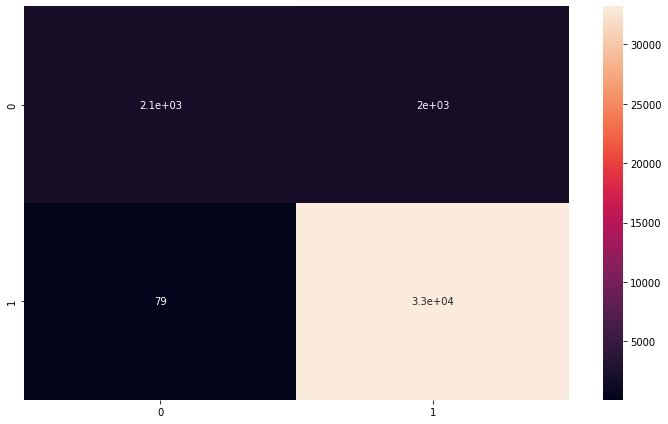

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(confmatrix_log,annot=True)
plt.tight_layout()
plt.show()


Ini yg Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
ranfo = RandomForestClassifier(n_estimators=100)

In [ ]:
ranfo.fit(X_train,Y_train)

RandomForestClassifier()

In [ ]:
ranfo_prediksi = ranfo.predict(X_test)

In [ ]:
accuracy_score(Y_test,ranfo_prediksi)

0.9701096426560867

In [ ]:
print(classification_report(Y_test,ranfo_prediksi))

              precision    recall  f1-score   support

           0       0.99      0.73      0.84      4032
           1       0.97      1.00      0.98     33271

    accuracy                           0.97     37303
   macro avg       0.98      0.87      0.91     37303
weighted avg       0.97      0.97      0.97     37303



In [ ]:
cm1 = confusion_matrix(Y_test,ranfo_prediksi)
cm1

array([[ 2958,  1074],
       [   41, 33230]])

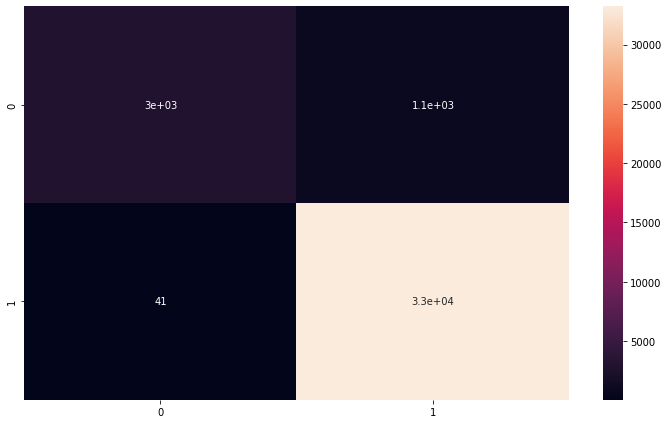

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(cm1,annot=True)
plt.tight_layout()
plt.show()

In [ ]:
ranfo.feature_importances_

array([0.04244985, 0.04837137, 0.00814681, 0.03567695, 0.07199948,
       0.00888926, 0.02436345, 0.01241003, 0.00515205, 0.02380882,
       0.00637307, 0.00892562, 0.02686588, 0.02106963, 0.088725  ,
       0.1522097 , 0.34162655, 0.07293649])

In [ ]:
link_file = "/content/drive/My Drive/PMM/Data_Validation.csv"
df_val = pd.read_csv(link_file)
df_val.head(93257)

FileNotFoundError: ignored

In [ ]:
le = preprocessing.LabelEncoder()
df_val.grade = le.fit_transform(df_val.grade)
df_val.sub_grade = le.fit_transform(df_val.sub_grade)
df_val.home_ownership = le.fit_transform(df_val.home_ownership)
df_val.verification_status = le.fit_transform(df_val.verification_status)
df_val.purpose = le.fit_transform(df_val.purpose)
df_val.emp_length = le.fit_transform(df_val.emp_length)
df_val.term = le.fit_transform(df_val.term)
df_val.term = df_val.term.astype(int)
df_val.emp_length = df_val.emp_length.astype(int)
df_val.purpose = df_val.purpose.astype(int)
df_val.verification_status = df_val.verification_status.astype(int)
df_val.home_ownership = df_val.home_ownership.astype(int)
df_val.grade = df_val.grade.astype(int)
df_val.sub_grade = df_val.sub_grade.astype(int)

In [ ]:
df_val.isnull().sum()

In [ ]:
modus = df_val['total_acc'].mode()[0]
df_val['total_acc'] = df_val['total_acc'].fillna(modus)
df_val['total_acc'].isna().sum()

In [ ]:
modus = df_val['emp_title'].mode()[0]
df_val['emp_title'] = df_val['emp_title'].fillna(modus)
df_val['emp_title'].isna().sum()

In [ ]:
modus = df_val['title'].mode()[0]
df_val['title'] = df_val['title'].fillna(modus)
df_val['title'].isna().sum()

In [ ]:
df_val.isnull().sum().sum()

In [ ]:
X_validation = df_val[['loan_amnt','funded_amnt','term','int_rate','installment','grade','sub_grade','emp_length','home_ownership','annual_inc','verification_status','purpose','dti','total_acc','total_pymnt','total_rec_prncp','recoveries','last_pymnt_amnt']]

In [ ]:
Y_logreg = logreg.predict(X_validation)

In [ ]:
A = pd.DataFrame(Y_logreg, columns = ['loan_status_class'])

In [ ]:
LR_output = pd.concat([df_val['id'], df_val['member_id'], A], axis=1)
LR_output

In [ ]:
Y_ranfo = logreg.predict(X_validation)

In [ ]:
B = pd.DataFrame(Y_ranfo, columns = ['loan_status_class'])

In [ ]:
ranfo_output = pd.concat([df_val['id'], df_val['member_id'], B], axis=1)
ranfo_output

In [ ]:
ranfo_output.to_excel(r'C:\Users\RIZKA F WINARNO\xxxxx.xlsx', index=False)

In [ ]:
rrrrrrrrrrrrrr